Handling Imbalanced Dataset Using SMOTE


What is SMOTE?
SMOTE stands for Synthetic Minority Oversampling Technique. It is a method used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE generates synthetic instances of the minority class by interpolating between existing minority class instances.

Visual Explanation of SMOTE
Consider a dataset with two features, x and y. Suppose we have majority class data points densely clustered in one region and minority class data points sparsely scattered in another region. Traditional upsampling replicates existing minority points, increasing their count but not their variance, as new points overlap existing ones.

SMOTE, however, creates synthetic data points by connecting nearest minority points and interpolating new points along the line segments between them. This process increases the variance of the minority class data, improving the representation of the minority class.

Creating an Imbalanced Dataset Using sklearn
To demonstrate SMOTE, we first create an imbalanced dataset using the make_classification function from sklearn.datasets. This function allows us to specify the number of samples, features, classes, clusters per class, and class weights to simulate imbalance.

In [2]:
from sklearn.datasets import make_classification


In [4]:
x,y=make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=42,n_redundant=0)

In [6]:
import pandas as pd

df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
df3=pd.concat([df1,df2],axis=1)
df3

,f1,f2,target
0,1.073546,-1.101339,0
1,0.755945,-1.172352,0
2,1.354479,-0.948528,0
3,3.103090,0.233485,0
4,1.951888,-0.270157,0
...,...,...,...
995,1.713939,0.451639,1
996,1.509473,-0.794996,0
997,-2.150901,-2.989372,0
998,2.451647,-0.156629,0


In [7]:
df3['target'].value_counts()

target
0    896
1    104
Name: count, dtype: int64

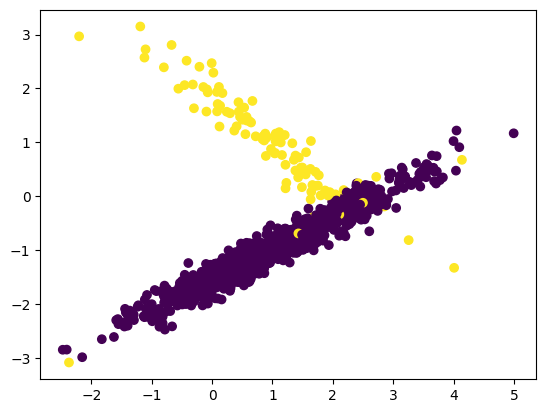

In [8]:
import matplotlib.pyplot as plt

plt.scatter(df3['f1'],df3['f2'],c=df3['target'])

In [9]:
!pip install imblearn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: c:\users\sharath r\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip


In [11]:
from imblearn.over_sampling import SMOTE
over_sampling=SMOTE()
x,y=over_sampling.fit_resample(df3[['f1','f2']],df3['target'])

In [13]:
x.shape

(1792, 2)

In [14]:
y.shape

(1792,)

In [18]:
len(y[y==0])

896

In [19]:
len(y[y==1])

896

In [21]:
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

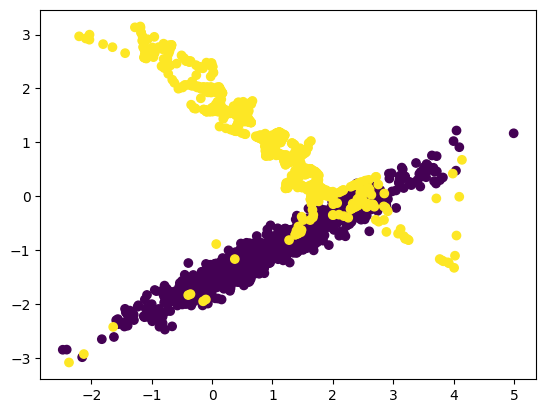

In [23]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])